# Capstone Project  -  The Battle of Neighborhoods in Munich
Week 4 Assignment  - Janos Breiteneicher - June 2021


## Introduction/Business Problem

Munich is a beautiful town in Southern Germany. There are many restaurants of all kind for ca 1.5 Mio inhabitants plus many tourists. 
I like to compare the 25 different boroughs in Size, Number of restaurants, Number of hotels, ... 

The heart of Munich is the **MARIENPLATZ**, which is the center and starting point of all streets in Bavaria. Despite the fact, that Munich is famous for breweries, beer festival and beer gardens, sometimes it is called northest city of ITALY. 

The interested _audience_ might be an investor, landlord or Italian chef , who is looking for the best environment for success

*Questions:* <br>
Is the number of restaurants decreasing in the suburbs ?  <br>
Where is a good place to open a new Italian Restaurant ? <br>
What is the ratio Restaurants/Inhabitants ?



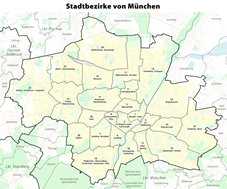

## Data Section

<ol>
    <li>First I get 25 Munich boroughs from a opengov page (www.opengov-muenchen.de).  </li>
    <li>I created a list of Neighborhoods (bezirksteile.csv).  </li>
    <li>Let's add the size, the geospatial coordinates from GeoCoder, ... </li>
    <li>Now we calculate the distance from center using the havershine algorithm</li>
    <li>In a second step the list of venues is retrieved from <b>Foursquare</b></li>
    <li>Now count the number of Hotels, Italian and other Restaurants</li>
    <li>The venues have to be assigned to the neighborhoods</li>
    <li>In a next step I will cluster Italian vs Other Restaurants</li>
</ol>
The <b>Italian Restaurants</b> cover the venue categories Pizzeria, Osteria, ...  <br> All other retaurants are aggregated.

I will create some scatter plot to show the density of restaurants per neighborhood.
Let's build a regression model to find the optimum quarter



## Data Import

In [ ]:
marienplatz = {'latitude':48.137222, 'longitude':11.575278}

In [ ]:
#address = 'Marienplatz'
address = 'München'

geolocator = Nominatim(user_agent="muc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(latitude, longitude))

map_munich = folium.Map(location=[latitude, longitude], zoom_start=17)

### Get the list of Boroughs of Munich

### Add Geo Coordinates and Distance to Center

In [ ]:
# Add the geo location Info to the data frame
geolocator = Nominatim(user_agent="muc_explorer")

for index, row in locations.iterrows():
    location = geolocator.geocode(row['Boroughs'])
    locations.loc[index, 'latitude'] = location.latitude
    locations.loc[index, 'longitude'] = location.longitude
    
# Laim is not found correctly! in Nominatim
locations.loc[24,'latitude']=48.140278
locations.loc[24,'longitude']=11.497222  


In [ ]:
# create map of Munich using latitude and longitude values   marienplatz = {'latitude':48.137222, 'longitude':11.575278}
map_munich = folium.Map(location=[latitude, longitude], zoom_start=12)

# add all markers to map
for lat, lng, label, rad in zip(locations['latitude'], locations['longitude'], locations['Boroughs'], locations['einwohnerdichte']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8*rad/145,  #size depending einwohnerdichte = density = inhabitants per area
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)

#Add Marker for Marienplatz    
folium.CircleMarker(
        [48.137222, 11.575278],
        radius=2,
        popup='Marienplatz',
        color='red',
        fill=True,
        fill_color='#3056cf',
        fill_opacity=0.4,
        parse_html=False).add_to(map_munich) 

map_munich

In [ ]:
#Calculate the distance in km from Central Center Marienplatz
marienplatz = {'latitude':48.137222, 'longitude':11.575278}

from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

#loop all Boroughs
for index, row in locations.iterrows():
    locations.loc[index, 'distance_to_center'] = haversine(marienplatz['longitude'], marienplatz['latitude'],row['longitude'], row['latitude'])

In [ ]:
print('The geograpical coordinate of Marienplatz, Munich are {}, {}.'.format(marienplatz['latitude'], marienplatz['longitude']))

# Get Foursquare Data per Borough and Neighborhood

## Cluster and Aggregate relevant data

## Analyse data

## Visualize Munich City Map

## Conclusions